# imports

In [ ]:
import numpy as np
import pandas as pd
import pickle
from sklearn.svm import SVC
import plotly.express as px
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
!pip install lightgbm
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as gbm
from xgboost import XGBClassifier
dados = pd.read_csv ('/content/drive/MyDrive/projeto_insufiencia_cardiaca/heart.csv', sep =',', encoding='iso-8859-1')




# Nova seção

# Nova seção

# Nova seção

In [ ]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
dados.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
dados.shape


(918, 12)

In [ ]:
dados['Age'].value_counts()


Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64

In [ ]:
dados['Age'].value_counts().sort_index()

Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: count, dtype: int64

In [ ]:
hist1 = px.histogram(dados, x="Age", nbins=90)
hist1.update_layout(width=800, height=500, title_text='Distribuição das Idades')
hist1.show()

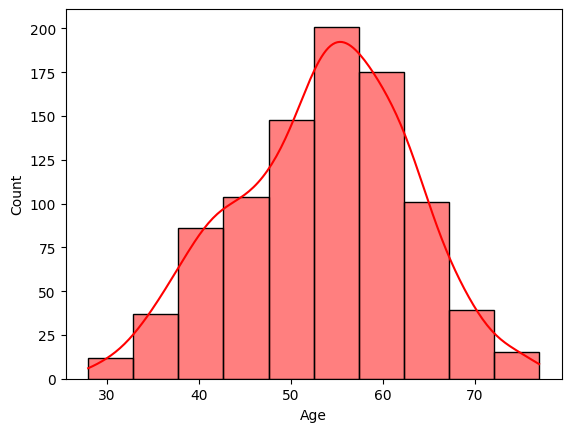

In [ ]:
sb.histplot (dados, x='Age', bins=10, color="red",  kde=True, stat="count");

In [ ]:
dados ['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

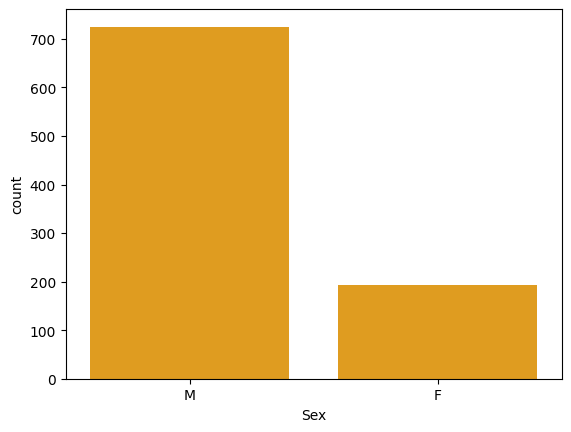

In [ ]:
sb.countplot (x='Sex', data=dados, color="orange");

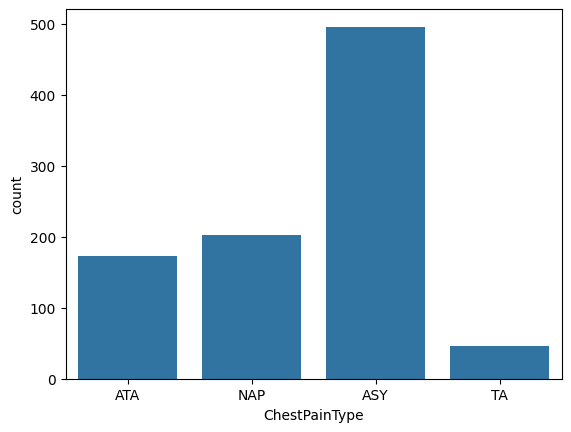

In [ ]:
sb.countplot (x='ChestPainType', data=dados);

In [ ]:
dados.RestingBP.value_counts().sort_index()

RestingBP
0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: count, Length: 67, dtype: int64

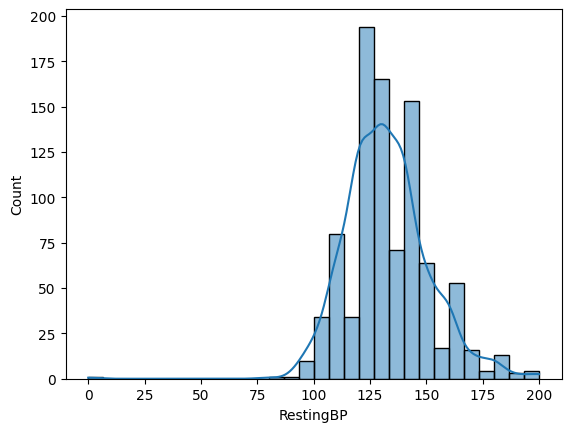

In [ ]:
sb.histplot ( dados, x='RestingBP', bins=30, stat="count", kde=True);

In [ ]:
hist1 = px.histogram(dados, x="RestingBP", nbins=30)
hist1.update_layout(width=800, height=500, title_text='Histograma do RestingBP')
hist1.show()

In [ ]:
dados.Cholesterol.value_counts().sort_index()

Cholesterol
0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: count, Length: 222, dtype: int64

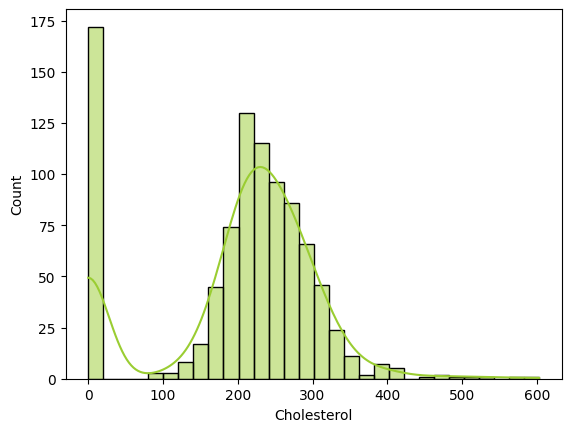

In [ ]:
sb.histplot ( dados, x='Cholesterol', kde=True, bins=30, stat ="count", color="yellowgreen");

In [ ]:
dados.FastingBS.value_counts().sort_index()

FastingBS
0    704
1    214
Name: count, dtype: int64

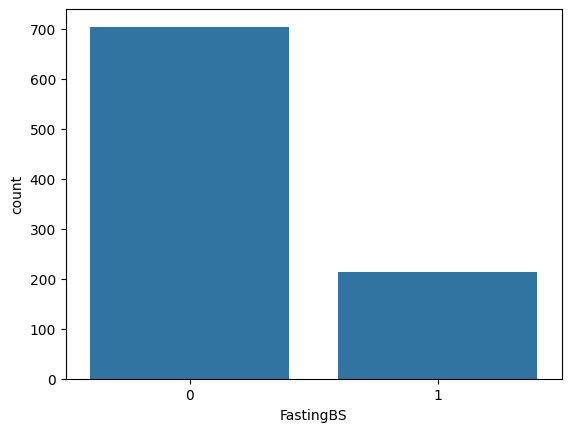

In [ ]:
sb.countplot(x='FastingBS', data=dados);

In [ ]:
dados.RestingECG.value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

<Axes: xlabel='RestingECG', ylabel='count'>

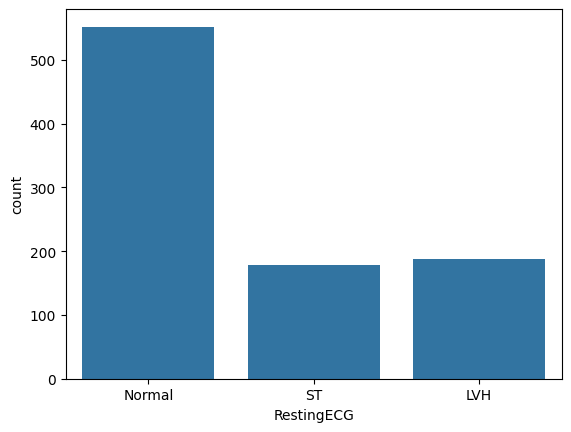

In [ ]:
sb.countplot (x='RestingECG', data=dados)

In [ ]:
dados.MaxHR.value_counts()


MaxHR
150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: count, Length: 119, dtype: int64

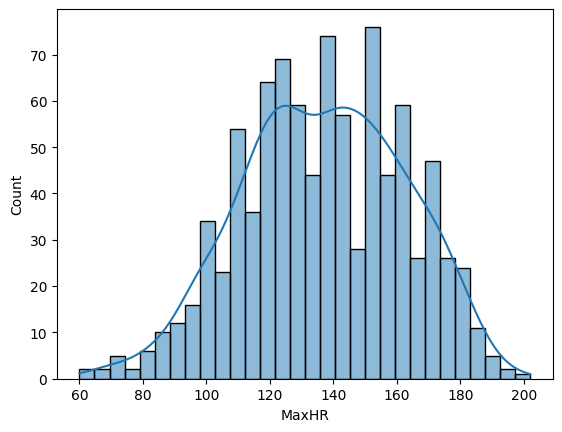

In [ ]:
sb.histplot(dados, x='MaxHR', kde=True, bins=30, stat="count");

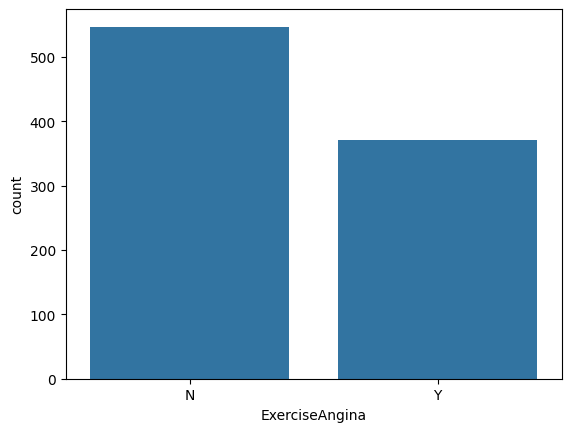

In [ ]:
sb.countplot (data=dados, x='ExerciseAngina');

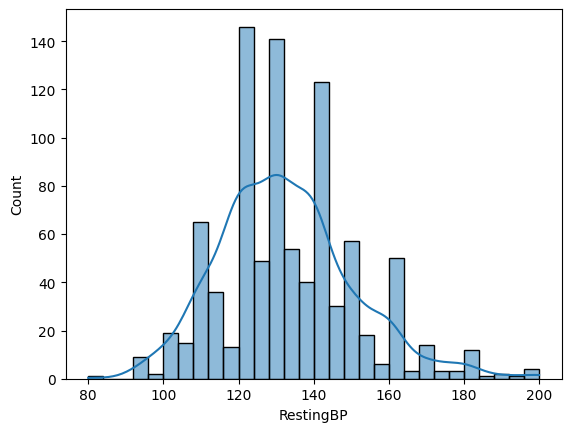

In [ ]:
dados2=dados.loc[dados.RestingBP != 0]
sb.histplot ( dados2, x='RestingBP', bins=30, stat="count", kde=True);

In [ ]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
dados2.Cholesterol.value_counts()

dados2.Cholesterol.replace(0, np.NaN, inplace=True)
dados2.isnull().sum()
dados2.Cholesterol.mean()
dados2 ['Cholesterol'].fillna(dados2 ['Cholesterol'].mean(), inplace=True)

<ipython-input-81-d5a978132e19>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-d5a978132e19>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
px.box(dados2, y= 'RestingBP')

In [ ]:
px.box(dados2, y='Cholesterol')

In [ ]:
dados2.to_csv('heart_tratado,.csv', sep =',', encoding= 'utf-8', index=False)

pré processamento de aprendizagem supervisionada


In [ ]:


df=pd.read_csv ('/content/drive/MyDrive/projeto_insufiencia_cardiaca/heart_tratado.csv', sep =',', encoding='iso-8859-1')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [ ]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
912,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
913,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
914,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
915,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1
916,38,M,NAP,138,175.0,0,Normal,173,N,0.0,Up,0


In [ ]:
df.shape

(917, 12)

In [ ]:
df2= pd.DataFrame.copy(df)

In [ ]:
df2 ['Sex'].replace({'F':0, 'M':1},inplace=True)
df2 ['ChestPainType'].replace ({'ATA':0, 'NAP':1, 'ASY':2, 'TA':3},inplace=True)
df2 ['RestingECG'].replace ({'Normal' : 0, 'ST' : 1, 'LVH' : 2},inplace=True)
df2 ['ExerciseAngina'].replace ({'N':0, 'Y': 1},inplace=True)
df2 ['ST_Slope'].replace ({'Flat':0, 'Up':1, 'Down':2},inplace=True)
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289.0,0,0,172,0,0.0,1,0
1,49,0,1,160,180.0,0,0,156,0,1.0,0,1
2,37,1,0,130,283.0,0,1,98,0,0.0,1,0
3,48,0,2,138,214.0,0,0,108,1,1.5,0,1
4,54,1,1,150,195.0,0,0,122,0,0.0,1,0


# **LEGENDA previsores:**


🟢 AGE= IDADE

🟣 SEX= SEXO (F=0 M=1)

🟠CHEST PAIN TYPE = TIPO DE DOR NO PEITO (ATA=(ANGINA ATIPICA = 0) NAP=(DOR NÃO ANGINOSA=1) ASY =(ASSINTOMATICO=2) TA=(ANGINA TIPICA=3))

🔴 RESTING BP= PRESSÃO ARTERIAK EN DESCANSO

🟡 CHOLESTEROL = COLESTEROL SÉRICO

🔵 FASTING BS = TESTE RAPIDO DE GLICEMIA EM JEJUM

⚪ RESTING ECG = ELETROCARDIOGRAMA EM REPOUSO (( NORMAL =0, ANORMALIDADE DA ONDA  ST=1 ,  HIPERTROFIA VENTRICULAR ESQUERDA LVH=2))

💓 MAXHR= FRENQUENCIA CARDIACA MAXIMA

💔 EXERCISE ANGINA = ANGINA INDUZIDA POR EXERCICIO EM RELAÇÃO AO REPOUSO (N = 0 Y = 1 )

↘ 	Oldpeak DEPRESSÃO DE ST INDUZIDA POR EXERCICIO EM RELAÇÃO AO REPOUSO

💖 ST SLOPE INCLINAÇÃO DO SEGMENTO ST (0 FLAT 1 UP 2 DOWN)?

🤕 HEART DISEASE= DOENÇA CARDIA (0 NÃO POSSUI 1 POSSUI)

In [ ]:
previsores= df2.iloc[:,0:11].values

In [ ]:
previsores

array([[40. ,  1. ,  0. , ...,  0. ,  0. ,  1. ],
       [49. ,  0. ,  1. , ...,  0. ,  1. ,  0. ],
       [37. ,  1. ,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [57. ,  1. ,  2. , ...,  1. ,  1.2,  0. ],
       [57. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [38. ,  1. ,  1. , ...,  0. ,  0. ,  1. ]])

In [ ]:
alvos=df2.iloc[:,11].values

In [ ]:
previsores.shape


(917, 11)

In [ ]:
alvos

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
df2.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,0.789531,1.452563,132.540894,244.635389,0.233370,0.604144,136.789531,0.404580,0.886696,0.568157,0.552890
std,9.437636,0.407864,0.852166,17.999749,53.347125,0.423206,0.806161,25.467129,0.491078,1.066960,0.619013,0.497466
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,1.000000,120.000000,214.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,2.000000,130.000000,244.635389,0.000000,0.000000,138.000000,0.000000,0.600000,0.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [ ]:


previsores_esc = StandardScaler().fit_transform(previsores)

previsores_esc

array([[-1.43220634,  0.51630861, -1.70548479, ..., -0.82431012,
        -0.83150225,  0.69801223],
       [-0.47805725, -1.9368261 , -0.5313635 , ..., -0.82431012,
         0.10625149, -0.91834437],
       [-1.75025603,  0.51630861, -1.70548479, ..., -0.82431012,
        -0.83150225,  0.69801223],
       ...,
       [ 0.37007527,  0.51630861,  0.64275778, ...,  1.21313565,
         0.29380223, -0.91834437],
       [ 0.37007527, -1.9368261 , -1.70548479, ..., -0.82431012,
        -0.83150225, -0.91834437],
       [-1.64423947,  0.51630861, -0.5313635 , ..., -0.82431012,
        -0.83150225,  0.69801223]])

In [ ]:
previsoresdf=pd.DataFrame (previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9,10
0,-1.432206,0.516309,-1.705485,0.414627,0.832075,-0.551733,-0.749818,1.383339,-0.824310,-0.831502,0.698012
1,-0.478057,-1.936826,-0.531364,1.526360,-1.212261,-0.551733,-0.749818,0.754736,-0.824310,0.106251,-0.918344
2,-1.750256,0.516309,-1.705485,-0.141240,0.719543,-0.551733,0.491306,-1.523953,-0.824310,-0.831502,0.698012
3,-0.584074,-1.936826,0.642758,0.303453,-0.574578,-0.551733,-0.749818,-1.131075,1.213136,0.575128,-0.918344
4,0.052026,0.516309,-0.531364,0.970493,-0.930931,-0.551733,-0.749818,-0.581047,-0.824310,-0.831502,0.698012
...,...,...,...,...,...,...,...,...,...,...,...
912,-0.902124,0.516309,1.816879,-1.252973,0.363191,-0.551733,-0.749818,-0.188170,-0.824310,0.293802,-0.918344
913,1.536257,0.516309,0.642758,0.636973,-0.968441,1.812470,-0.749818,0.165420,-0.824310,2.356860,-0.918344
914,0.370075,0.516309,0.642758,-0.141240,-2.131275,-0.551733,-0.749818,-0.856061,1.213136,0.293802,-0.918344
915,0.370075,-1.936826,-1.705485,-0.141240,-0.161960,-0.551733,1.732430,1.461915,-0.824310,-0.831502,-0.918344


In [ ]:
previsoresdf.describe()


,0,1,2,3,4,5,6,7,8,9,10
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.859654e-16,-7.748558e-17,1.084798e-16,7.767929e-16,-1.869340e-16,4.649135e-17,0.000000,-5.114048e-16,-1.046055e-16,7.748558e-17,-1.937139e-17
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-2.704405e+00,-1.936826e+00,-1.705485e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-0.749818,-3.016886e+00,-8.243101e-01,-3.269662e+00,-9.183444e-01
25%,-6.900904e-01,5.163086e-01,-5.313635e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-0.749818,-6.596226e-01,-8.243101e-01,-8.315022e-01,-9.183444e-01
50%,5.202558e-02,5.163086e-01,6.427578e-01,-1.412398e-01,0.000000e+00,-5.517333e-01,-0.749818,4.755658e-02,-8.243101e-01,-2.688500e-01,-9.183444e-01
75%,6.881250e-01,5.163086e-01,6.427578e-01,4.146267e-01,4.194568e-01,-5.517333e-01,0.491306,7.547357e-01,1.213136e+00,5.751284e-01,6.980122e-01
max,2.490407e+00,5.163086e-01,1.816879e+00,3.749826e+00,6.721265e+00,1.812470e+00,1.732430,2.561971e+00,1.213136e+00,4.982571e+00,2.314369e+00


In [ ]:
previsores2=df.iloc[:, 0:11].values
previsores2

array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
previsores2[:, 1]= LabelEncoder().fit_transform(previsores[:, 1])
previsores2 [:, 2]=LabelEncoder().fit_transform(previsores[:, 2])
previsores2 [:, 6]= LabelEncoder().fit_transform(previsores [:, 6])
previsores2 [:, 8] = LabelEncoder().fit_transform(previsores [:, 8])
previsores2 [:, 10] = LabelEncoder().fit_transform(previsores[:, 10])
previsores2


array([[40, 1, 0, ..., 0, 0.0, 1],
       [49, 0, 1, ..., 0, 1.0, 0],
       [37, 1, 0, ..., 0, 0.0, 1],
       ...,
       [57, 1, 2, ..., 1, 1.2, 0],
       [57, 0, 0, ..., 0, 0.0, 0],
       [38, 1, 1, ..., 0, 0.0, 1]], dtype=object)

In [ ]:
previsores.shape

(917, 11)

In [ ]:
previsores3= ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,6,8,10])],
                               remainder='passthrough').fit_transform(previsores2)

In [ ]:
previsores3.shape


(917, 20)

In [ ]:
previsores3=pd.DataFrame(previsores3)
previsores3_esc = StandardScaler().fit_transform(previsores3)
previsores3_esc = pd.DataFrame (previsores3_esc)
previsores3_esc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.516309,0.516309,2.073784,-0.531524,-1.085425,-0.22981,0.815013,-0.490781,-0.507826,0.824310,-0.824310,-1.001091,1.149573,-0.271607,-1.432206,0.414627,0.832075,-0.551733,1.383339,-0.831502
1,1.936826,-1.936826,-0.482210,1.881384,-1.085425,-0.22981,0.815013,-0.490781,-0.507826,0.824310,-0.824310,0.998910,-0.869888,-0.271607,-0.478057,1.526360,-1.212261,-0.551733,0.754736,0.106251
2,-0.516309,0.516309,2.073784,-0.531524,-1.085425,-0.22981,-1.226974,2.037569,-0.507826,0.824310,-0.824310,-1.001091,1.149573,-0.271607,-1.750256,-0.141240,0.719543,-0.551733,-1.523953,-0.831502
3,1.936826,-1.936826,-0.482210,-0.531524,0.921298,-0.22981,0.815013,-0.490781,-0.507826,-1.213136,1.213136,0.998910,-0.869888,-0.271607,-0.584074,0.303453,-0.574578,-0.551733,-1.131075,0.575128
4,-0.516309,0.516309,-0.482210,1.881384,-1.085425,-0.22981,0.815013,-0.490781,-0.507826,0.824310,-0.824310,-1.001091,1.149573,-0.271607,0.052026,0.970493,-0.930931,-0.551733,-0.581047,-0.831502


In [ ]:
previsores3_esc.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.084798e-16,-1.472226e-16,-3.874279e-17,3.874279e-17,1.937139e-17,6.973702e-17,-9.298269e-17,1.549712e-17,0.000000,-4.261707e-17,4.261707e-17,0.000000,-3.874279e-17,8.523413e-17,1.859654e-16,7.884157e-16,3.014189e-15,-1.549712e-17,-5.114048e-16,-1.859654e-16
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-5.163086e-01,-1.936826e+00,-4.822104e-01,-5.315237e-01,-1.085425e+00,-2.298105e-01,-1.226974e+00,-4.907810e-01,-0.507826,-1.213136e+00,-8.243101e-01,-1.001091,-8.698879e-01,-2.716072e-01,-2.704405e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-3.016886e+00,-3.269662e+00
25%,-5.163086e-01,5.163086e-01,-4.822104e-01,-5.315237e-01,-1.085425e+00,-2.298105e-01,-1.226974e+00,-4.907810e-01,-0.507826,-1.213136e+00,-8.243101e-01,-1.001091,-8.698879e-01,-2.716072e-01,-6.900904e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-6.596226e-01,-8.315022e-01
50%,-5.163086e-01,5.163086e-01,-4.822104e-01,-5.315237e-01,9.212982e-01,-2.298105e-01,8.150134e-01,-4.907810e-01,-0.507826,8.243101e-01,-8.243101e-01,0.998910,-8.698879e-01,-2.716072e-01,5.202558e-02,-1.412398e-01,3.198360e-15,-5.517333e-01,4.755658e-02,-2.688500e-01
75%,-5.163086e-01,5.163086e-01,-4.822104e-01,-5.315237e-01,9.212982e-01,-2.298105e-01,8.150134e-01,-4.907810e-01,-0.507826,8.243101e-01,1.213136e+00,0.998910,1.149573e+00,-2.716072e-01,6.881250e-01,4.146267e-01,4.194568e-01,-5.517333e-01,7.547357e-01,5.751284e-01
max,1.936826e+00,5.163086e-01,2.073784e+00,1.881384e+00,9.212982e-01,4.351412e+00,8.150134e-01,2.037569e+00,1.969177,8.243101e-01,1.213136e+00,0.998910,1.149573e+00,3.681787e+00,2.490407e+00,3.749826e+00,6.721265e+00,1.812470e+00,2.561971e+00,4.982571e+00


# salvamento de variaveis e atributos


In [ ]:

arq1= open('heart.pkl', 'wb')

pickle.dump (alvos, arq1)

arq2= open('heart2.pkl', 'wb')

pickle.dump (previsores, arq2)

arq_esc= open('heart_esc.pkl', 'wb')

pickle.dump (previsores_esc, arq_esc)

arq3= open('heart3.pkl', 'wb')

pickle.dump (previsores2, arq3)

arq4= open('heart4.pkl', 'wb')

pickle.dump (previsores3, arq4)

arq_esc2= open('heart_esc2.pkl', 'wb')

pickle.dump (previsores3_esc, arq_esc2)









alvo = variável que se pretende atingir (tem ou não doença cardíaca).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

previsores2 = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas pelo labelencoder.

previsores3 = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder, sem escalonar.

previsores3_esc = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder escalonada.


In [ ]:
previsores = pickle.load (arq2)

UnsupportedOperation: read

In [ ]:
arq1= open('heart.pkl', 'rb')
alvos=pickle.load(arq1)
alvos

#redução de dimensões

In [ ]:
from sklearn.decomposition import PCA
pca = PCA (n_components = 4)
previsores_pca=pca.fit_transform(previsores2)
previsores_pca

NameError: name 'previsores2' is not defined

In [ ]:

previsores_pca = pd.DataFrame(previsores_pca)
previsores_pca

# inicio dos treinos


In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores2, alvos, train_size= 0.3, random_state= 0)

In [ ]:
x_treino.shape

(275, 11)

In [ ]:
x_teste.shape

(642, 11)

In [ ]:
y_treino.shape

(275,)

In [ ]:
y_teste.shape

(642,)

# Nayve Bayes

In [ ]:
naive = GaussianNB()
naive.fit (x_treino, y_treino)



GaussianNB()

In [ ]:
previsoes_naives = naive.predict (x_teste)
previsoes_naives


array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,

In [ ]:
previsoes_treino = naive.predict(x_treino)
previsoes_treino

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [ ]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,

In [ ]:
y_treino

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [ ]:

print ("acurácia: %2.f%%"% (accuracy_score (y_teste, previsoes_naives)*100))

acurácia: 84%


In [ ]:
print ("acurácia: %2.f%%"% (accuracy_score (y_treino, previsoes_treino)*100))

acurácia: 83%


In [ ]:
confusion_matrix (y_teste, previsoes_naives)

array([[224,  62],
       [ 41, 315]])

In [ ]:

print (classification_report(y_teste, previsoes_naives))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       286
           1       0.84      0.88      0.86       356

    accuracy                           0.84       642
   macro avg       0.84      0.83      0.84       642
weighted avg       0.84      0.84      0.84       642



#validação cruzada kfold

In [ ]:
kfold = KFold (n_splits=35, shuffle=True, random_state = 5)

In [ ]:
modelo = GaussianNB()
resultado = cross_val_score(modelo, previsores3_esc, alvos, cv=kfold)

print ("acuracia média %.2f%%" % (resultado.mean()*100))

acuracia média 85.38%


#maquina de vetor de suporte


#regressao logistica

In [ ]:
logistica = LogisticRegression (random_state=1, max_iter=200, penalty="l2", tol=0.0001, C=1, solver="lbfgs")
logistica.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1, max_iter=200, random_state=1)

In [ ]:
logistica.coef_

array([[ 0.02500782,  1.21899917,  0.52127419, -0.01882285,  0.00665286,
         1.19819062, -0.07317334, -0.0159412 ,  0.93576516,  0.63435221,
        -1.73253333]])

In [ ]:
previsoes_logistica = logistica.predict (x_teste)
previsoes_logistica

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
print ("Acuracia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica)*100))

Acuracia: 82.71%


In [ ]:
confusion_matrix(y_teste, previsoes_logistica)

array([[240,  46],
       [ 65, 291]])

In [ ]:
previsoes_treino= logistica.predict (x_treino)
previsoes_treino

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
accuracy_score(y_treino,previsoes_treino)

0.8581818181818182

In [ ]:
logisticateste= LogisticRegression (random_state=1, max_iter=200, penalty="l2", tol= 0.0001, C=1, solver = "lbfgs")
logisticateste.fit (x_teste, y_teste)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1, max_iter=200, random_state=1)

#arvore de decisao

In [ ]:
arvore= DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=3)
arvore.fit(x_treino, y_treino)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
previsores_arvore = arvore.predict (x_teste)
previsores_arvore

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
previsores_arvore2 = arvore.predict (x_treino)
previsores_arvore2

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [ ]:
print ("acurácia: %.2f%%" % (accuracy_score(y_teste, previsores_arvore)*100))

acurácia: 79.75%


In [ ]:
 accuracy_score(y_treino, previsores_arvore2)

0.88

In [ ]:
y_treino

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [ ]:
kfold= KFold (n_splits=30, shuffle=True, random_state=5)
kfold

KFold(n_splits=30, random_state=5, shuffle=True)

In [ ]:
modelo1 = DecisionTreeClassifier (criterion='entropy', random_state=0, max_depth=3)
resultado1= cross_val_score(modelo, previsores3_esc, alvos, cv=kfold)
print ("acurácia: %.2f%%" % (resultado.mean()*100))

acurácia: 85.38%


# random forest


In [ ]:
random = RandomForestClassifier(n_estimators=130, criterion ='gini', random_state=0, max_depth=5)

random.fit(x_treino, y_treino)



RandomForestClassifier(max_depth=5, n_estimators=130, random_state=0)

In [ ]:
previsores_rf=random.predict(x_teste)
previsores_rf

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
previsores_rff=random.predict(x_treino)
previsores_rff

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [ ]:
print ("acurácia: %.2f%%" % (accuracy_score(y_teste, previsores_rf)*100))

acurácia: 84.74%


In [ ]:
print ("acurácia: %.2f%%" % (accuracy_score(y_treino, previsores_rff)*100))


acurácia: 96.00%


#  xgbclasifer
**negrito**

# Nova seção

In [ ]:
xg =  XGBClassifier ( max_depth=2, learning_rate = 0.115, n_estimators=200, objective ='binary:logistic', random_state=0)
xg.fit (x_treino, y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.115, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
previsoresxg= xg.predict(x_teste)

In [ ]:
print ("acuracia: %.2f%%"% (accuracy_score (y_teste, previsoresxg)*100))

acuracia: 85.20%


# lightgbm


In [ ]:
dataset= gbm.Dataset (x_treino, y_treino)

In [ ]:
x_treino.shape



(275, 11)

In [ ]:
x_teste.shape


(642, 11)

In [ ]:
parametros= {
    'num_leaves':250,
    'objective': 'binary',
    'max_depth': 1,
    'learning_rate': 0.2,
    'max_bin':200,
    'n_estimators': 20
}

In [ ]:
lgbm=gbm.train (parametros, dataset, num_boost_round = 200)

[LightGBM] [Info] Number of positive: 151, number of negative: 124
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 275, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549091 -> initscore=0.196998
[LightGBM] [Info] Start training from score 0.196998


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning:

Found `n_estimators` in params. Will use it instead of argument



In [ ]:
previsores_lgbm=lgbm.predict(x_treino)
previsores_lgbm

array([0.12643007, 0.12643007, 0.14598769, 0.10126228, 0.79063278,
       0.81057656, 0.72911042, 0.81678399, 0.34534907, 0.83219251,
       0.77808173, 0.79431902, 0.36556076, 0.85051001, 0.90107663,
       0.90107663, 0.08708543, 0.90107663, 0.14464448, 0.90107663,
       0.52663441, 0.12643007, 0.30522985, 0.87707755, 0.11930667,
       0.30741942, 0.76578883, 0.72696907, 0.86842552, 0.66101527,
       0.10028226, 0.16648274, 0.77443326, 0.80549482, 0.82319917,
       0.93314985, 0.58156273, 0.22743074, 0.92198564, 0.34151479,
       0.91188746, 0.85722015, 0.80486475, 0.1163337 , 0.76061948,
       0.74608783, 0.14598769, 0.77994355, 0.86842552, 0.70989732,
       0.40577424, 0.52131055, 0.21889237, 0.81678399, 0.86848385,
       0.33384571, 0.16648274, 0.84747777, 0.84876761, 0.24146727,
       0.34151479, 0.60951371, 0.1163337 , 0.12643007, 0.12643007,
       0.88526682, 0.72696907, 0.68140407, 0.92198564, 0.90107663,
       0.84747777, 0.54761826, 0.77816989, 0.92276   , 0.10028

In [ ]:
previsores_lgbmtst=lgbm.predict(x_teste)
previsores_lgbm

array([0.12643007, 0.12643007, 0.14598769, 0.10126228, 0.79063278,
       0.81057656, 0.72911042, 0.81678399, 0.34534907, 0.83219251,
       0.77808173, 0.79431902, 0.36556076, 0.85051001, 0.90107663,
       0.90107663, 0.08708543, 0.90107663, 0.14464448, 0.90107663,
       0.52663441, 0.12643007, 0.30522985, 0.87707755, 0.11930667,
       0.30741942, 0.76578883, 0.72696907, 0.86842552, 0.66101527,
       0.10028226, 0.16648274, 0.77443326, 0.80549482, 0.82319917,
       0.93314985, 0.58156273, 0.22743074, 0.92198564, 0.34151479,
       0.91188746, 0.85722015, 0.80486475, 0.1163337 , 0.76061948,
       0.74608783, 0.14598769, 0.77994355, 0.86842552, 0.70989732,
       0.40577424, 0.52131055, 0.21889237, 0.81678399, 0.86848385,
       0.33384571, 0.16648274, 0.84747777, 0.84876761, 0.24146727,
       0.34151479, 0.60951371, 0.1163337 , 0.12643007, 0.12643007,
       0.88526682, 0.72696907, 0.68140407, 0.92198564, 0.90107663,
       0.84747777, 0.54761826, 0.77816989, 0.92276   , 0.10028

In [ ]:
for i in range (0, 642):
  if (previsores_lgbmtst[i] >= .5):
    previsores_lgbmtst [i]=1
  else:
    previsores_lgbmtst[i]=0

previsores_lgbmtst

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1.

In [ ]:
for i in range (0, 275):
  if (previsores_lgbm[i] >= .5):
    previsores_lgbm [i]=1
  else:
    previsores_lgbm[i]=0

previsores_lgbm

array([0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 0.

In [ ]:
print ("acuracia: %.2f%%" % (accuracy_score (y_teste, previsores_lgbmtst)*100))

acuracia: 81.00%


In [ ]:
print ("acuracia: %.2f%%" % (accuracy_score (y_treino, previsores_lgbm)*100))

acuracia: 87.64%


# catboost


In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
913,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
914,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
915,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [ ]:
previsores4 = df.iloc[:, 0:11]

In [ ]:
alvos4= df.iloc[:,11]


In [ ]:
categoricas = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
catboost= CatBoostClassifier(task_type='CPU', iterations=200, learning_rate=0.35, depth=1,  random_state= 3, eval_metric="Accuracy")

In [ ]:
catboost.fit(x_treino, y_treino, cat_features= categoricas, plot=False, eval_set=(x_teste, y_teste))

0:	learn: 0.8327273	test: 0.7507788	best: 0.7507788 (0)	total: 50.7ms	remaining: 10.1s
1:	learn: 0.8327273	test: 0.7507788	best: 0.7507788 (0)	total: 55.8ms	remaining: 5.52s
2:	learn: 0.8327273	test: 0.7507788	best: 0.7507788 (0)	total: 57.5ms	remaining: 3.77s
3:	learn: 0.8327273	test: 0.7507788	best: 0.7507788 (0)	total: 61.6ms	remaining: 3.02s
4:	learn: 0.8436364	test: 0.7866044	best: 0.7866044 (4)	total: 65.4ms	remaining: 2.55s
5:	learn: 0.8581818	test: 0.7912773	best: 0.7912773 (5)	total: 68.9ms	remaining: 2.23s
6:	learn: 0.8618182	test: 0.8161994	best: 0.8161994 (6)	total: 73.1ms	remaining: 2.01s
7:	learn: 0.8472727	test: 0.8037383	best: 0.8161994 (6)	total: 76.7ms	remaining: 1.84s
8:	learn: 0.8581818	test: 0.8068536	best: 0.8161994 (6)	total: 92.7ms	remaining: 1.97s
9:	learn: 0.8472727	test: 0.8037383	best: 0.8161994 (6)	total: 100ms	remaining: 1.91s
10:	learn: 0.8618182	test: 0.8099688	best: 0.8161994 (6)	total: 104ms	remaining: 1.78s
11:	learn: 0.8690909	test: 0.8146417	best: 0

In [ ]:
previsores_cat = catboost.predict(x_teste)
previsores_cat2= catboost.predict(x_treino)

In [ ]:
print ("acuracia: %.2f%%" % (accuracy_score (y_teste, previsores_cat)*100))

acuracia: 86.60%


In [ ]:
print ("acuracia: %.2f%%" % (accuracy_score (y_treino, previsores_cat2)*100))

acuracia: 92.36%


# automatizando hipermarametros


In [ ]:
gbm=GradientBoostingClassifier (random_state=0)

In [ ]:
param_grid = dict (
    n_estimators = [20, 50, 100,250],
    learning_rate = [0.01, 0.05, 0.15, 0.2, 0.3, 0.4],
    max_depth = [0.1, 0.5, 0.8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
)

In [ ]:
gs= GridSearchCV (gbm,param_grid, scoring='roc_auc', cv=4)

In [ ]:
gs.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


288 fits failed out of a total of 1248.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.01, 0.05, 0.15, 0.2, 0.3, 0.4],
                         'max_depth': [0.1, 0.5, 0.8, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                       10],
                         'n_estimators': [20, 50, 100, 250]},
             scoring='roc_auc')

In [ ]:
gs.best_params_

{'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 20}

In [ ]:
resultado  = pd.DataFrame (gs.cv_results_)
print (resultado.shape)
resultado.head ()

(312, 15)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000506,0.000225,0.0,0.0,0.01,0.1,20,"{'learning_rate': 0.01, 'max_depth': 0.1, 'n_e...",NaN,NaN,NaN,NaN,NaN,NaN,241
1,0.000203,0.000015,0.0,0.0,0.01,0.1,50,"{'learning_rate': 0.01, 'max_depth': 0.1, 'n_e...",NaN,NaN,NaN,NaN,NaN,NaN,241
2,0.000224,0.000034,0.0,0.0,0.01,0.1,100,"{'learning_rate': 0.01, 'max_depth': 0.1, 'n_e...",NaN,NaN,NaN,NaN,NaN,NaN,241
3,0.000179,0.000007,0.0,0.0,0.01,0.1,250,"{'learning_rate': 0.01, 'max_depth': 0.1, 'n_e...",NaN,NaN,NaN,NaN,NaN,NaN,241
4,0.000197,0.000012,0.0,0.0,0.01,0.5,20,"{'learning_rate': 0.01, 'max_depth': 0.5, 'n_e...",NaN,NaN,NaN,NaN,NaN,NaN,241


In [ ]:
resultado.sort_values (by='mean_test_score', ascending=False, inplace=True)

resultado.reset_index (drop=True, inplace=True)

resultado [['param_max_depth', 'param_learning_rate', 'param_n_estimators', 'rank_test_score', 'params']]

,param_max_depth,param_learning_rate,param_n_estimators,rank_test_score,params
0,1,0.2,20,1,"{'learning_rate': 0.2, 'max_depth': 1, 'n_esti..."
1,1,0.15,50,2,"{'learning_rate': 0.15, 'max_depth': 1, 'n_est..."
2,3,0.2,20,3,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti..."
3,1,0.15,20,4,"{'learning_rate': 0.15, 'max_depth': 1, 'n_est..."
4,3,0.05,100,5,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est..."
...,...,...,...,...,...
307,0.5,0.4,250,241,"{'learning_rate': 0.4, 'max_depth': 0.5, 'n_es..."
308,0.8,0.4,20,241,"{'learning_rate': 0.4, 'max_depth': 0.8, 'n_es..."
309,0.8,0.4,50,241,"{'learning_rate': 0.4, 'max_depth': 0.8, 'n_es..."
310,0.8,0.4,100,241,"{'learning_rate': 0.4, 'max_depth': 0.8, 'n_es..."
